<div align="center"> <h1>PUBG Data Description<h1/></div>

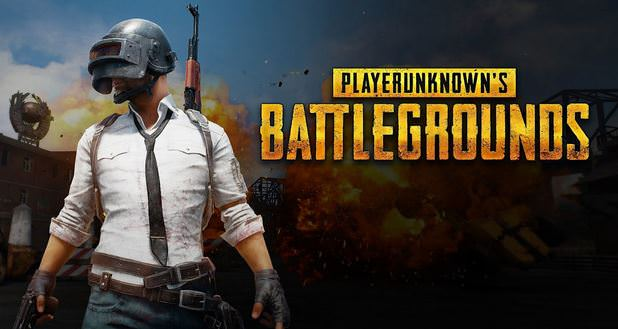

In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.
You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 players per group.


### Data fields:

-	**DBNOs** - Number of enemy players knocked.
-	**assists** - Number of enemy players this player damaged that were killed by teammates.
-	**boosts** - Number of boost items used.
-	**damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.
-	**headshotKills** - Number of enemy players killed with headshots.
-	**heals** - Number of healing items used.
-	**Id** - Player’s Id
-	**killPlace** - Ranking in match of number of enemy players killed.
-	**killPoints** - Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
-	**killStreaks** - Max number of enemy players killed in a short amount of time.
-	**kills** - Number of enemy players killed.
-	**longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
-	**matchDuration** - Duration of match in seconds.
-	**matchId** - ID to identify matches. There are no matches that are in both the training and testing set.
-	**matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
-	**rankPoints** - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.
-	**revives** - Number of times this player revived teammates.
-	**rideDistance** - Total distance traveled in vehicles measured in meters.
-	**roadKills** - Number of kills while in a vehicle.
-	**swimDistance** - Total distance traveled by swimming measured in meters.
-	**teamKills** - Number of times this player killed a teammate.
-	**vehicleDestroys** - Number of vehicles destroyed.
-	**walkDistance** - Total distance traveled on foot measured in meters.
-	**weaponsAcquired** - Number of weapons picked up.
-	**winPoints** - Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
-	**groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
-	**numGroups** - Number of groups we have data for in the match.
-	**maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
-	**winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match


In [1]:
# importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read the dataset

In [2]:
# reading csv file using pandas
df = pd.read_csv("data.csv")

df.head(10)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429
5,2862125,e705cb7a4446ea,9d7180a567d020,b146588581df18,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,446.00,3,0,0.4946
6,365937,e253262031e08f,e5df2dcdaf3f4b,c1385ae84655e6,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,45.86,1,0,0.1939
7,3651102,c264a5ce0d4ca1,0efbbf391d7f62,b280791eb7a3fd,0,8,170.20,0,0,1,...,0,0.0,0,221.0,0,0,3297.00,5,0,0.9688
8,2363197,342437cd2b5680,7acbacbed1b711,99cbf12f555f61,0,2,338.70,2,0,15,...,1,3349.0,0,0.0,0,0,1846.00,5,0,0.7174
9,271498,3cf3cc81325a37,537c4bd393dcff,38a8b94623d77d,2,1,230.80,2,0,1,...,0,0.0,0,0.0,0,0,3781.00,5,0,0.8387


### Check the datatype of all the columns.

In [3]:
# checking datatype of all columns
data_type = df.dtypes
data_type

Unnamed: 0           int64
Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [4]:
df.shape

(1111742, 30)

The dataset have 30 features.

### Print all the columns of the dataframe.

In [5]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

### Find the summary of all the numerical columns and write your findings about it.

In [6]:
# DataFrame.describe() is used to give out the summary of all the numerical columns in a dataframe
num_summary = df.describe().T
num_summary

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1111742.0,2.224362e+06,1.283879e+06,6.0,1112440.25,2.223772e+06,3.337954e+06,4446964.0
assists,1111742.0,2.336738e-01,5.894028e-01,0.0,0.00,0.000000e+00,0.000000e+00,17.0
boosts,1111742.0,1.106655e+00,1.716050e+00,0.0,0.00,0.000000e+00,2.000000e+00,24.0
damageDealt,1111742.0,1.307364e+02,1.711755e+02,0.0,0.00,8.411000e+01,1.859000e+02,5990.0
DBNOs,1111742.0,6.573612e-01,1.146023e+00,0.0,0.00,0.000000e+00,1.000000e+00,35.0
headshotKills,1111742.0,2.266488e-01,6.033356e-01,0.0,0.00,0.000000e+00,0.000000e+00,64.0
heals,1111742.0,1.370348e+00,2.683819e+00,0.0,0.00,0.000000e+00,2.000000e+00,73.0
killPlace,1111742.0,4.759562e+01,2.747025e+01,1.0,24.00,4.700000e+01,7.100000e+01,100.0
killPoints,1111742.0,5.044301e+02,6.274006e+02,0.0,0.00,0.000000e+00,1.171000e+03,2170.0
kills,1111742.0,9.255097e-01,1.562216e+00,0.0,0.00,0.000000e+00,1.000000e+00,72.0


In [7]:
#Looking at missing values
df.isna().any()

Unnamed: 0         False
Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
winPlacePerc        True
dtype: bool

In [8]:
# How many values are missing.
df.winPlacePerc.isna().value_counts()

False    1111741
True           1
Name: winPlacePerc, dtype: int64

### The average person kills how many players?

In [9]:
avg = df['kills'].mean()
print("\nThe average person kills :", avg,"player")


The average person kills : 0.9255096955948412 player


### 99% of people have how many kills?

In [10]:
nn_per = df["kills"].quantile(0.99)
print("\n99% of people have",nn_per,"kills")


99% of people have 7.0 kills


### The most kills ever recorded are how much?

In [11]:
most_kill = df["kills"].max()
print("\nThe most kill ever recorded are :",most_kill)


The most kill ever recorded are : 72


### Distribution of the match's duration.

c:\users\subhajit\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


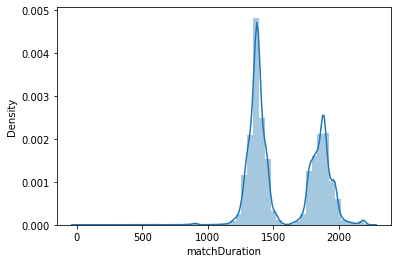

In [12]:
sns.distplot( df['matchDuration'] );

### Distribution of the walk distance.

c:\users\subhajit\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


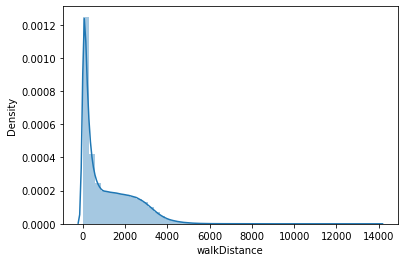

In [13]:
sns.distplot( df['walkDistance'] );

### Distribution of the match's duration vs walk distance

Text(0.5, 0, 'Walk Distance')

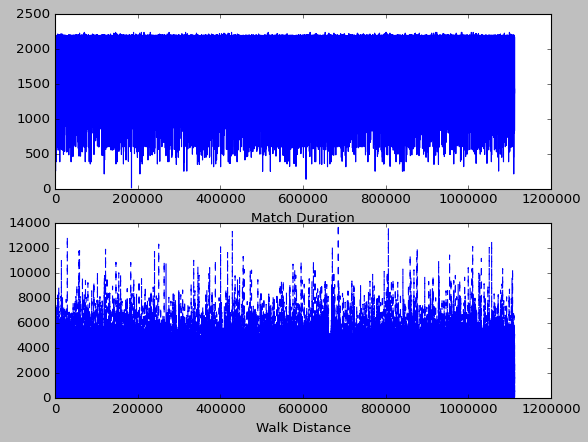

In [14]:

%matplotlib inline
plt.style.use('classic')
plt.figure()

# ploting for matchDuration
plt.subplot(2,1,1)
plt.plot(df["matchDuration"],"-")
plt.xlabel("Match Duration")

# ploting for walkDistance
plt.subplot(2,1,2)
plt.plot(df["walkDistance"],"--")
plt.xlabel("Walk Distance")

### Pairplot the dataframe.

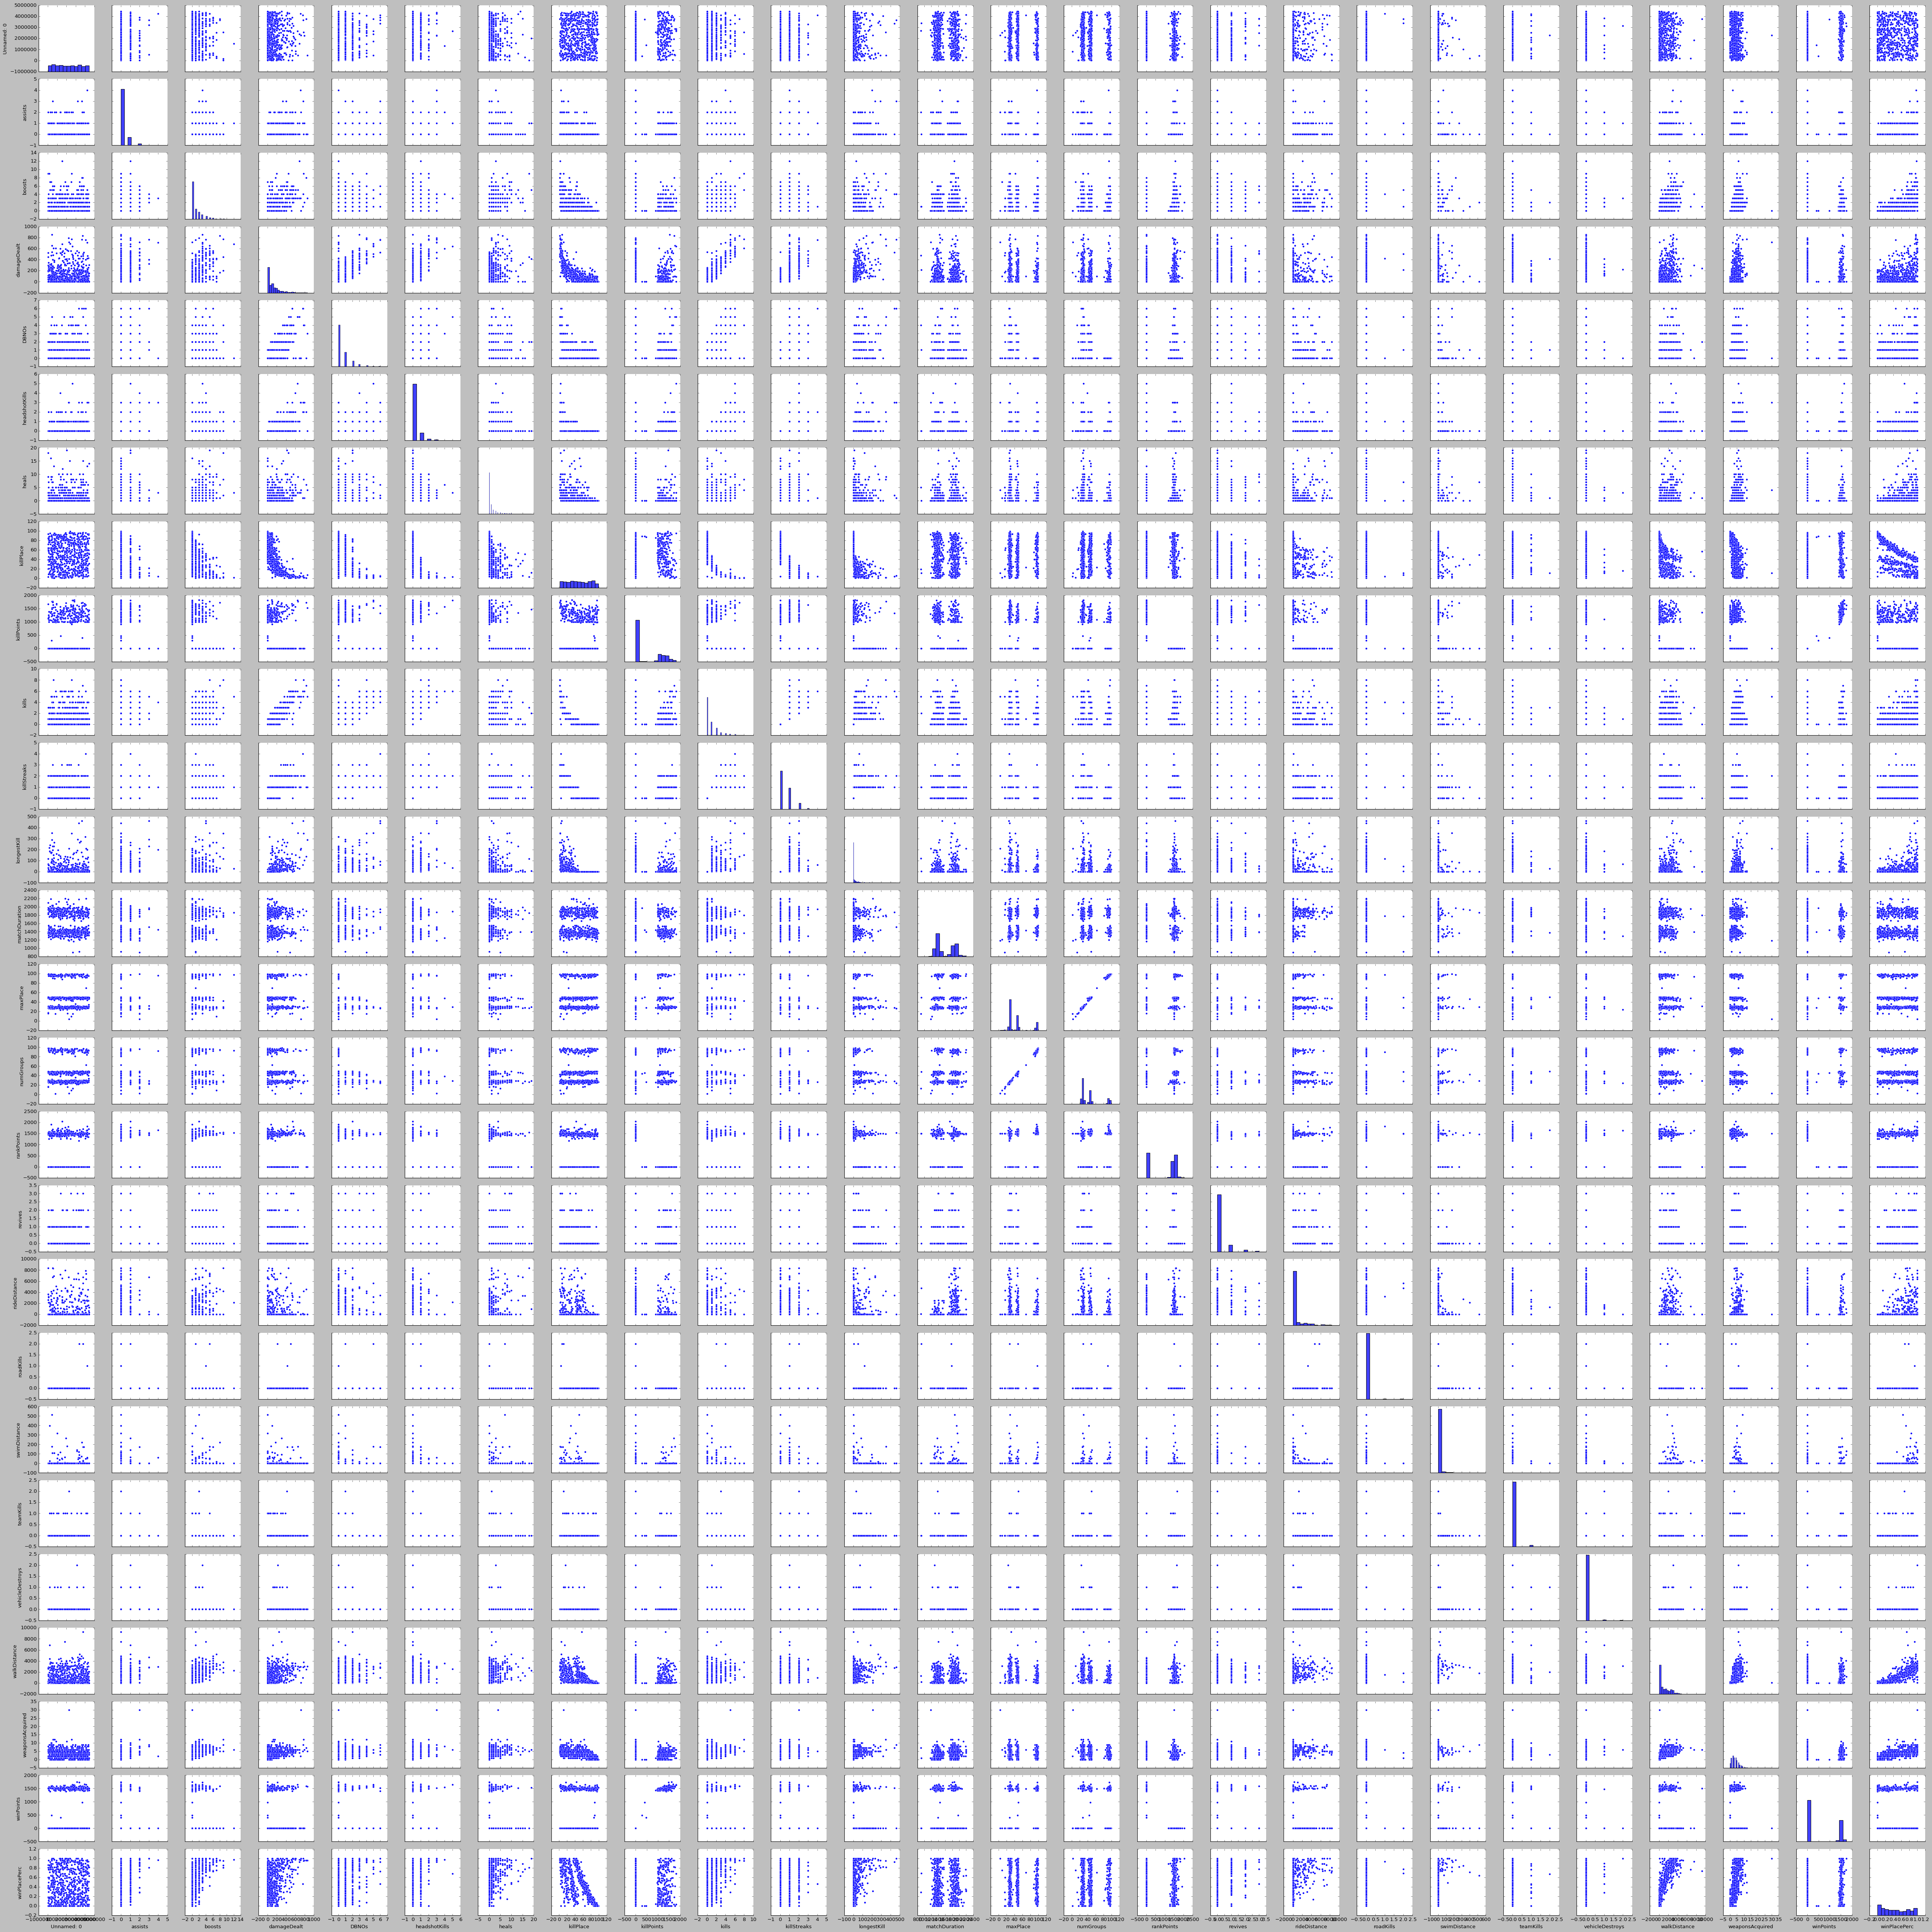

In [15]:
sns.pairplot(df.head(700));

### How many unique values are there in 'matchType' and what are their counts?

In [16]:
uni = pd.unique(df['matchType'])
print("\nUnique value in matchType is :",uni)
n_uni = len(uni)
print("\nCount of unique value in matchType is :",n_uni)


Unique value in matchType is : ['squad-fpp' 'solo-fpp' 'solo' 'duo' 'duo-fpp' 'squad' 'normal-squad-fpp'
 'normal-duo-fpp' 'normal-solo-fpp' 'crashfpp' 'crashtpp' 'normal-squad'
 'flaretpp' 'flarefpp' 'normal-duo' 'normal-solo']

Count of unique value in matchType is : 16


### Distribution of ‘matchType’ vs 'killPoints'.

c:\users\subhajit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


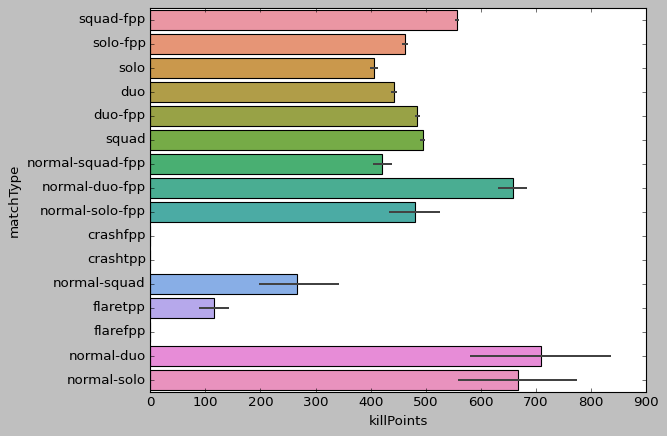

In [17]:
sns.barplot(df['killPoints'],df['matchType']);


### Distribution of ‘matchType’ vs ‘weaponsAcquired’

c:\users\subhajit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


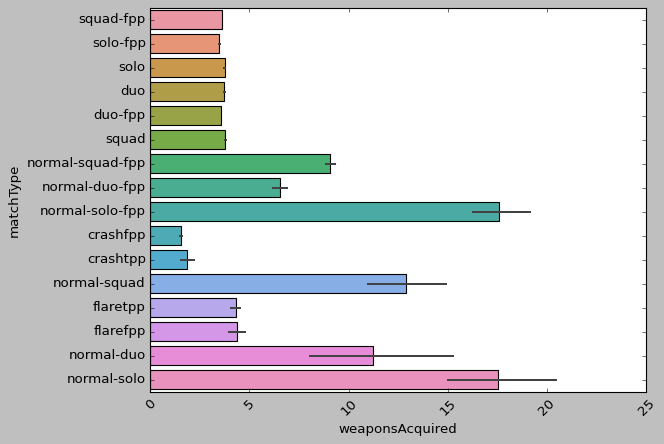

In [18]:
sns.barplot(df['weaponsAcquired'],df['matchType']);
plt.xticks(rotation=45)
plt.show()

### Find the Categorical columns.

In [19]:
cat_col = df.select_dtypes('object').columns 
cat_col

Index(['Id', 'groupId', 'matchId', 'matchType'], dtype='object')

### Distribution of ‘matchType’ vs ‘winPlacePerc’

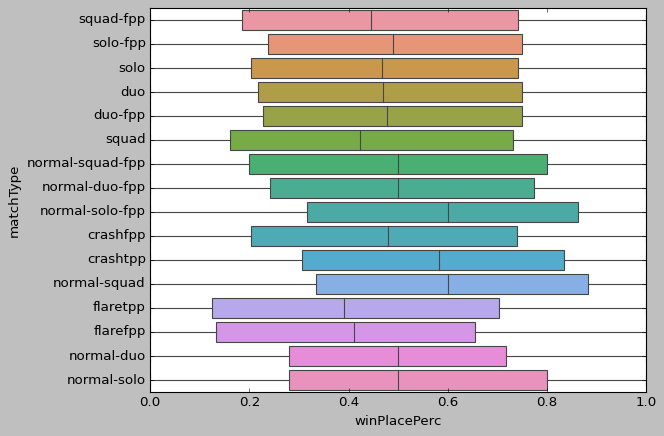

In [20]:
sns.boxplot(x='winPlacePerc', y='matchType', data=df);

### Distribution of ‘matchType’ vs ‘matchDuration’

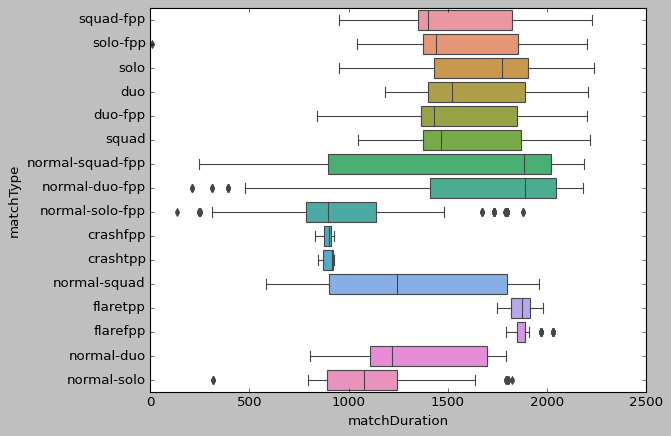

In [21]:
sns.boxplot(x='matchDuration', y='matchType', data=df);

### Match Types

In [22]:
m_types = df.loc[:,"matchType"].value_counts().to_frame().reset_index()
m_types.columns = ["Type","Count"]
m_types

,Type,Count
0,squad-fpp,438781
1,duo-fpp,249927
2,squad,156573
3,solo-fpp,133854
4,duo,78039
5,solo,45679
6,normal-squad-fpp,4286
7,crashfpp,1581
8,normal-duo-fpp,1400
9,flaretpp,633


<AxesSubplot:ylabel='None'>

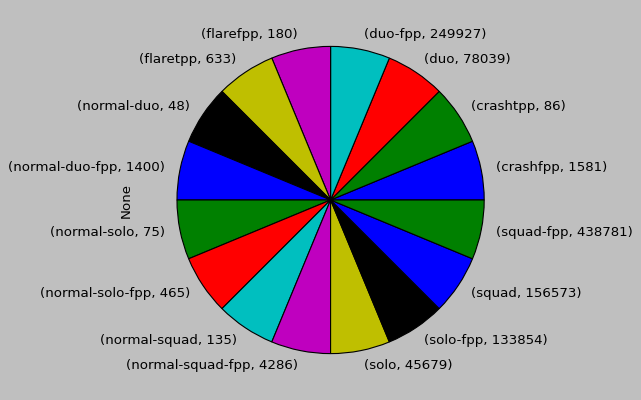

In [23]:
m_types.value_counts().plot(kind='pie')

### Kills and damage dealt 

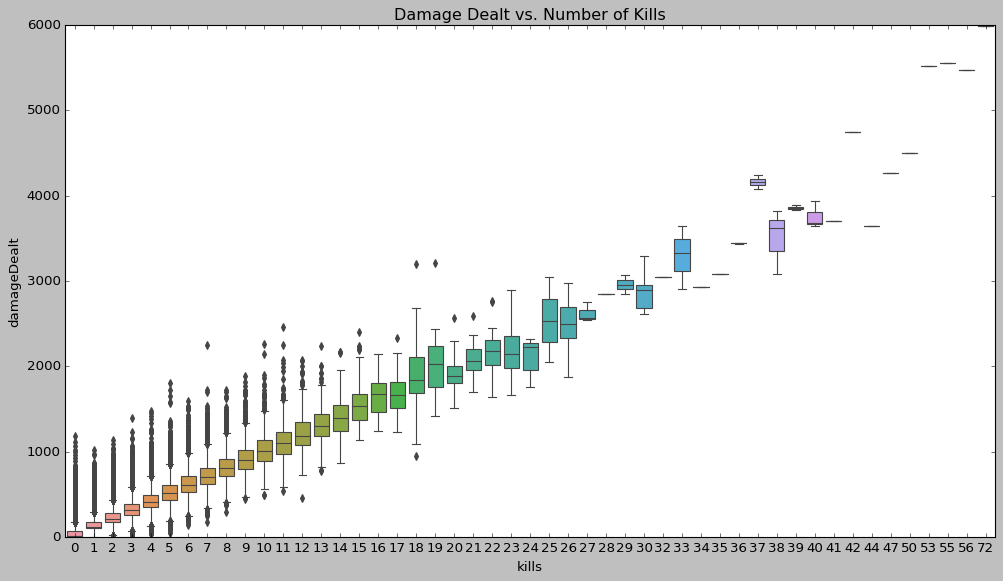

In [24]:
plt.figure(figsize=(15,8))
ax1=sns.boxplot(x="kills",y="damageDealt", data = df)
ax1.set_title("Damage Dealt vs. Number of Kills")
plt.show()

There is an obvious correlation between number of kills and damage dealt. We see also that there are some outliers, more in the lower range. As the number of kills increases number of outliers reduces - these players rather kill than wound enemies. The maximum kills is 72 which is much bigger than the wast majority of players scores.

###  Driving vs. Walking

In [25]:
walk0 = df["walkDistance"] == 0
ride0 = df["rideDistance"] == 0
swim0 = df["swimDistance"] == 0
print("{} of players didn't walk at all, {} players didn't drive and {} didn't swim." .format(walk0.sum(),ride0.sum(),swim0.sum()))

24936 of players didn't walk at all, 827573 players didn't drive and 1039125 didn't swim.


### Create a sum of walking, driving and swimming distances for each row.

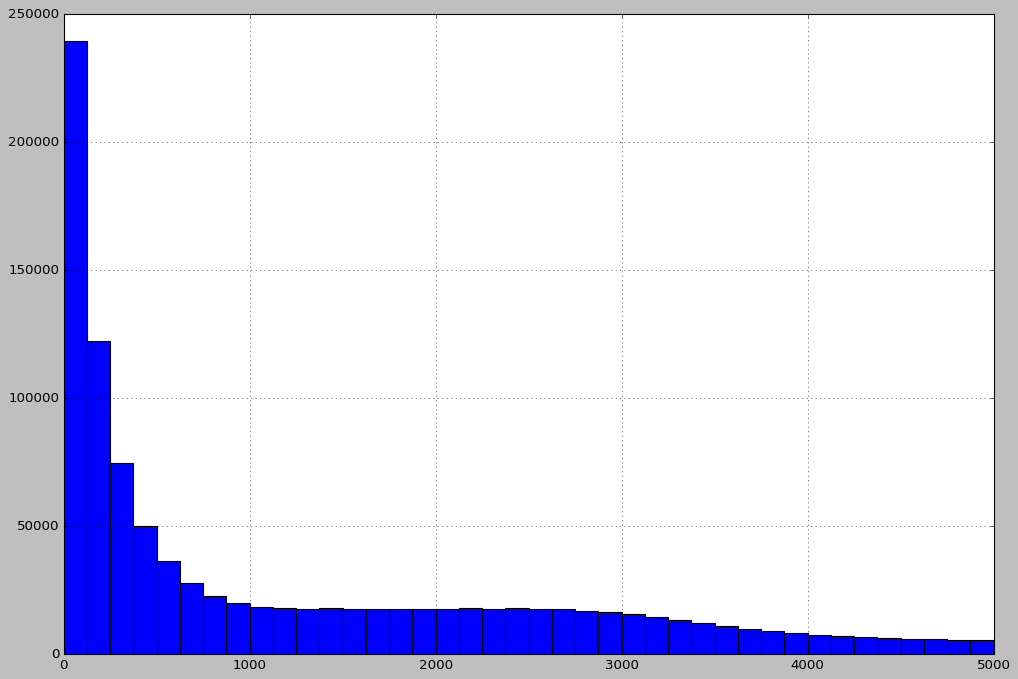

In [26]:
travel_dist = df["walkDistance"] + df["rideDistance"] + df["swimDistance"]
travel_dist = travel_dist[travel_dist<5000]
travel_dist.hist(bins=40, figsize = (15,10))
plt.show()

### Create a sum of following columns viz. headshotKills, teamKills, roadKills.

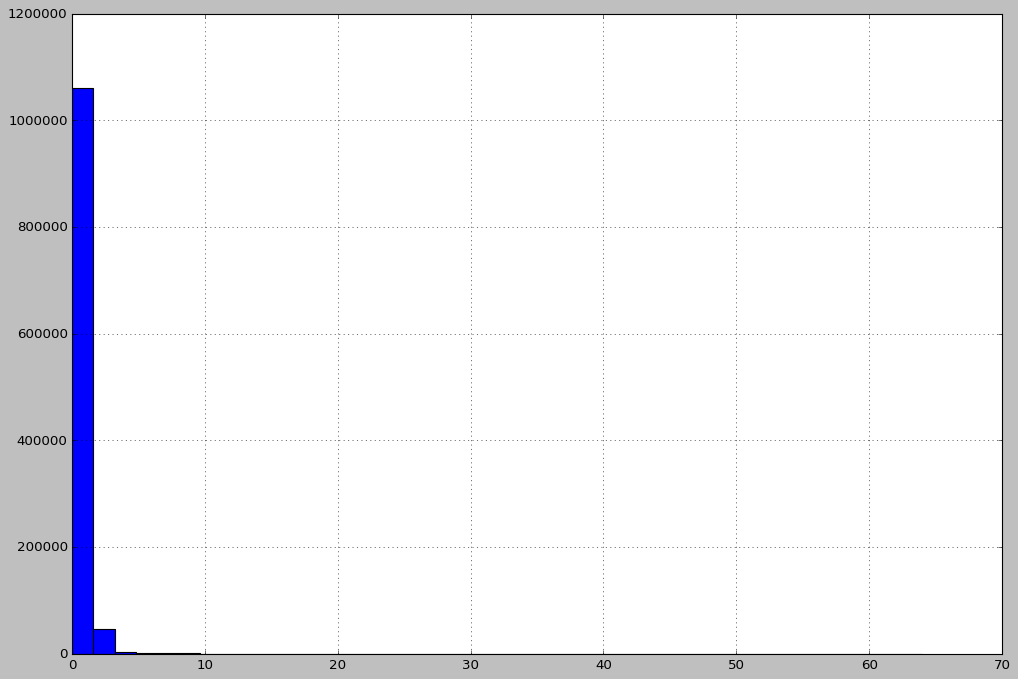

In [27]:
KILL= df['headshotKills'] + df['teamKills'] + df['roadKills']
KILL.hist(bins=40, figsize = (15,10))
plt.show()

### Correlation map

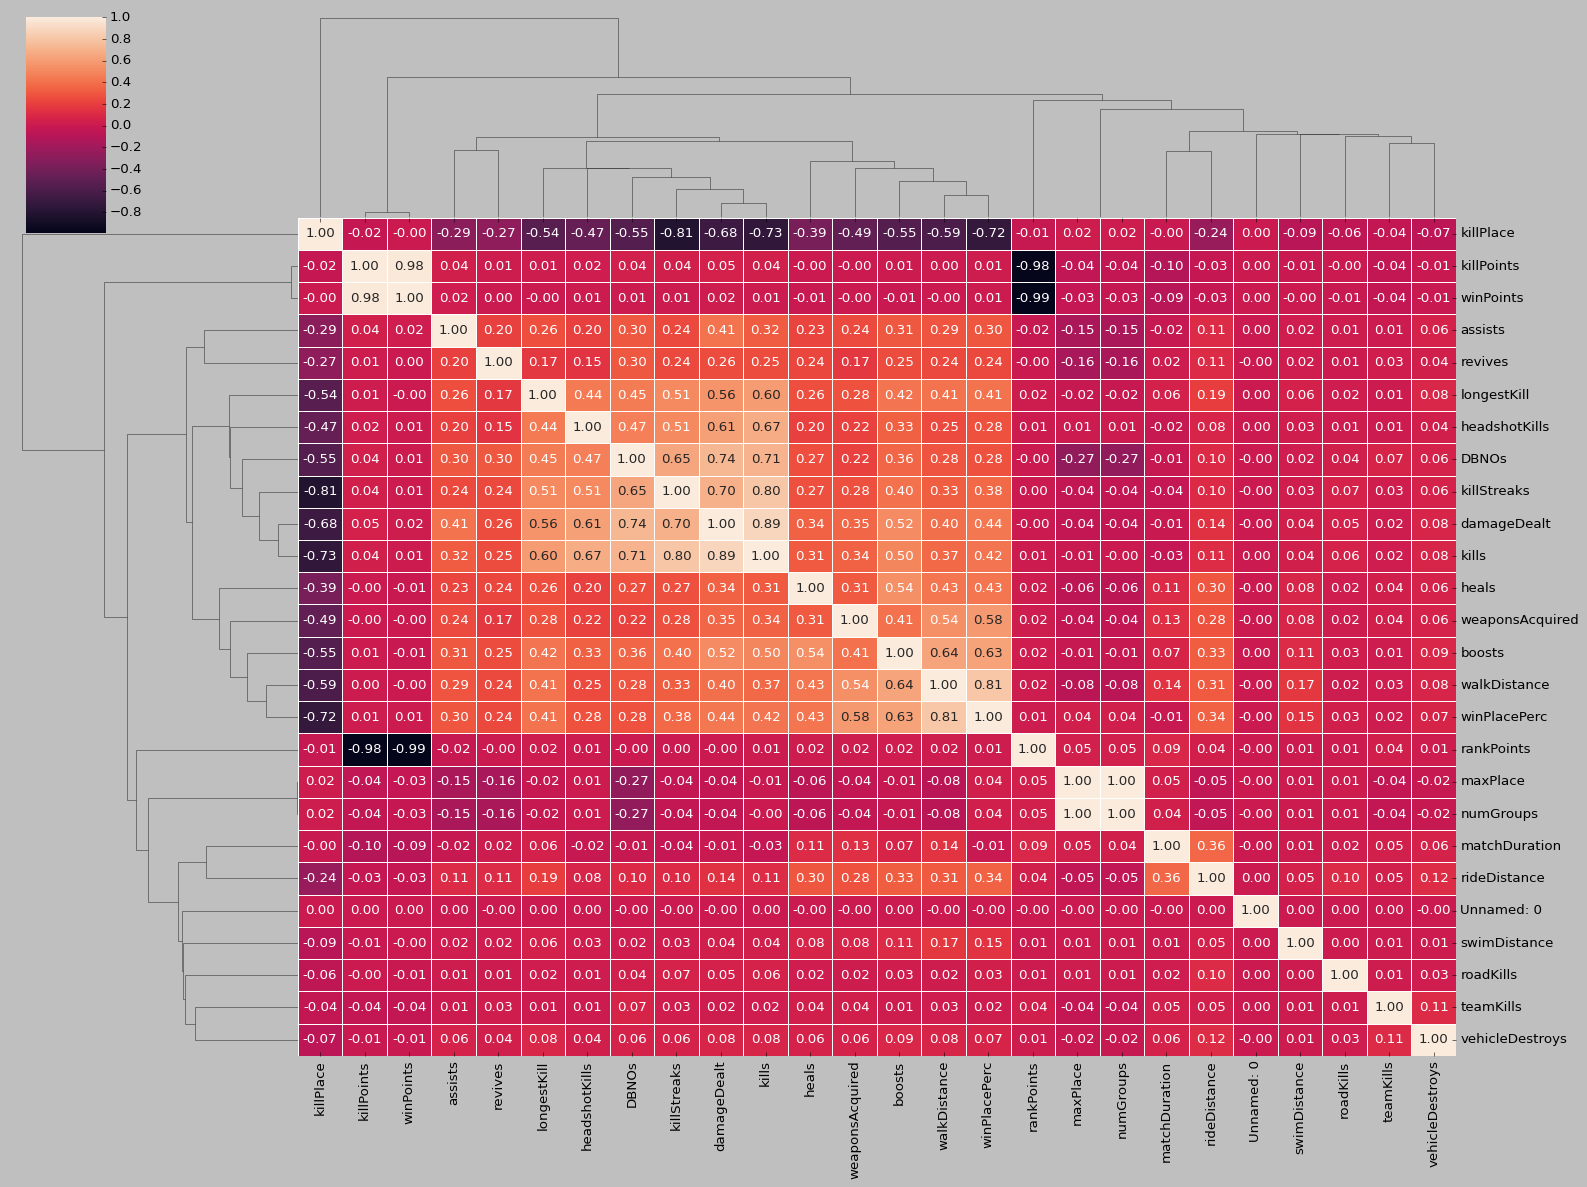

In [28]:
ax = sns.clustermap(df.corr(), annot=True, linewidths=.6, fmt= '.2f', figsize=(20, 15))
plt.show()

### Analysis of TOP 10% of players

In [29]:
top10 = df[df["winPlacePerc"]>0.9]
print("TOP 10% overview\n")
print("Average number of kills: {:.1f}\nMinimum: {}\nThe best: {}\n95% of players within: {} kills." 
      .format(top10["kills"].mean(), top10["kills"].min(), top10["kills"].max(),top10["kills"].quantile(0.95)))

TOP 10% overview

Average number of kills: 2.6
Minimum: 0
The best: 72
95% of players within: 8.0 kills.


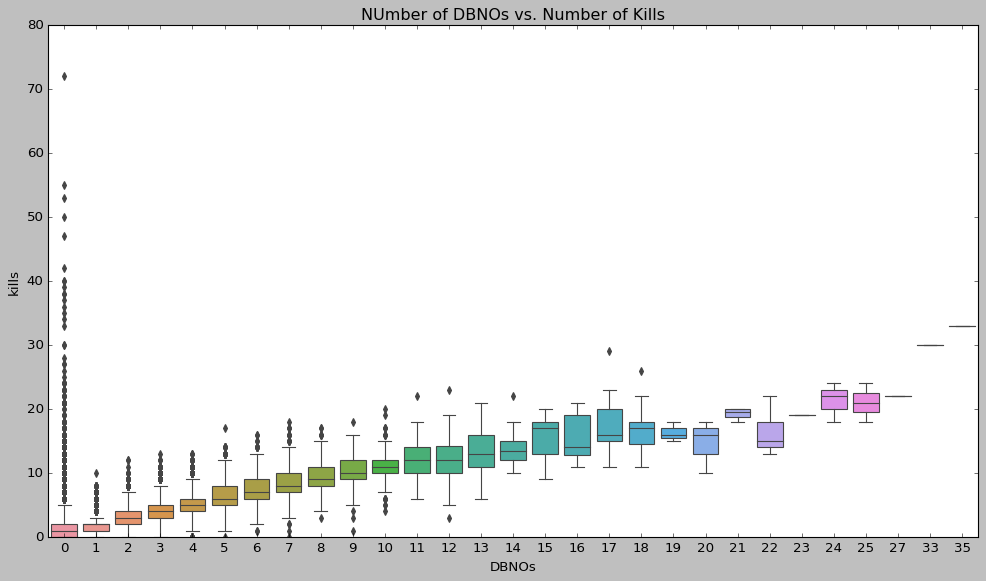

In [30]:
plt.figure(figsize=(15,8))
ax3 = sns.boxplot(x="DBNOs",y="kills", data = top10)
ax3.set_title("NUmber of DBNOs vs. Number of Kills")
plt.show()

### Let's see their way of travelling and comare this to the overall population.

Average walking distance: 2813.1505810157773


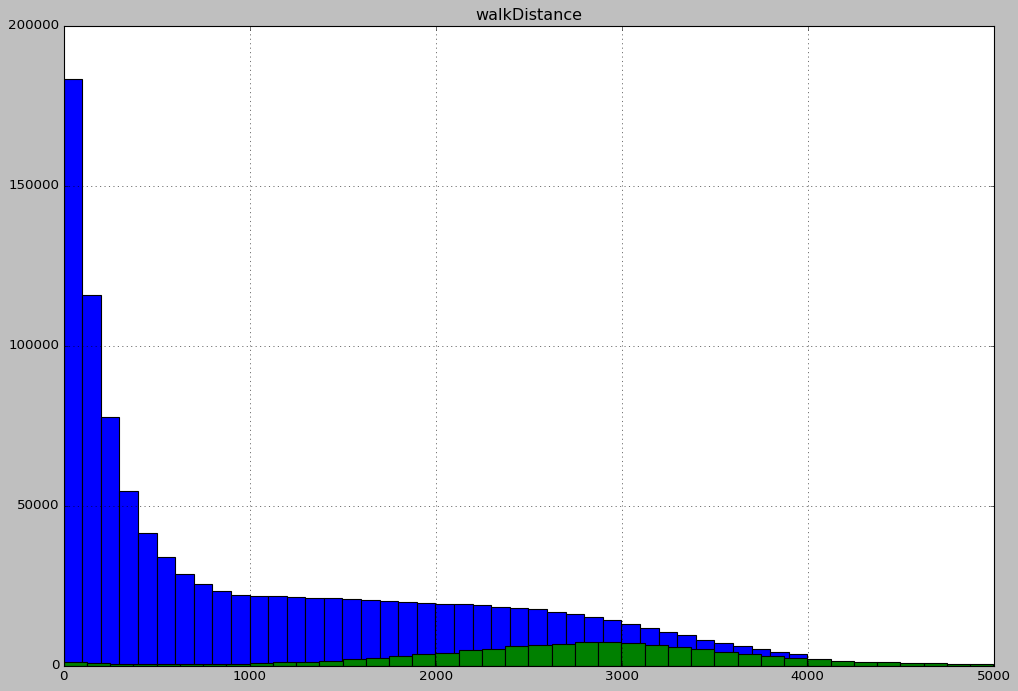

In [31]:
walk = df.query('walkDistance >0 & walkDistance <4000')
fig, ax1 = plt.subplots(figsize = (15,10))
walk.hist('walkDistance', bins=40, figsize = (15,10), ax = ax1)
walk10 = top10[top10['walkDistance']<5000]
walk10.hist('walkDistance', bins=40, figsize = (15,10), ax = ax1)

print("Average walking distance: " + str(top10['walkDistance'].mean()))

### Distribution of squad, solos, duos types in one column

c:\users\subhajit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


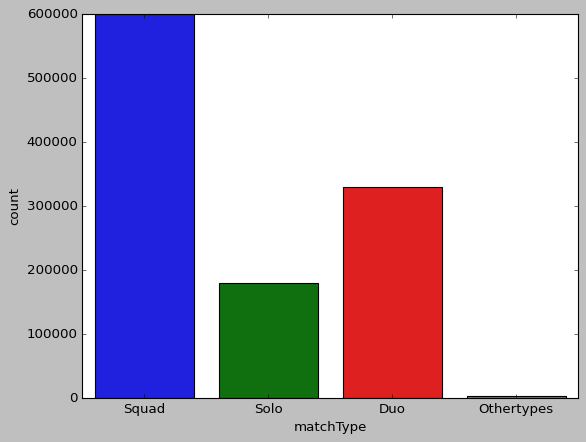

In [32]:
df.matchType.replace(['squad-fpp','squad','normal-squad-fpp','normal-squad'],'Squad',inplace=True)
df.matchType.replace(['duo-fpp','duo','normal-duo-fpp','normal-duo'],'Duo',inplace=True)
df.matchType.replace(['solo-fpp','solo','normal-solo-fpp','normal-solo'],'Solo',inplace=True)
df.matchType.replace(['crashfpp','flaretpp','flarefpp','crashtpp'],'Othertypes',inplace=True)
#display countplot of new columns values
sns.countplot(df.matchType);